# Imports

## Import gen

In [1]:
import pandas as pd
import os,sys
import pickle
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
from IPython.display import clear_output

2022-06-16 15:35:58.662301: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.config.list_physical_devices()

2022-06-16 15:36:01.873683: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2022-06-16 15:36:01.875226: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-16 15:36:01.928242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-06-16 15:36:01.928320: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-16 15:36:01.932085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-06-16 15:36:01.932205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-06-16 15:36:01.935020: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuf

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Import Sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import fetch_openml

## Import Keras

In [5]:
from keras.utils.vis_utils import plot_model

In [6]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,SpatialDropout2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

## Import datasets

Read from file or if file do not exist get from keras

In [8]:
path_to_file = '../data/fashion_dataset.pkl'

In [9]:
if os.path.exists(path_to_file):
    print('Getting dataset from local')
    with open(path_to_file, 'rb') as f:
        mnist_fashion = pickle.load(f)
else:
    print('Getting dataset from keras')
    mnist_fashion = fashion_mnist.load_data()
    with open(path_to_file, 'wb') as f:
        pickle.dump(mnist_fashion, f)


Getting dataset from local


In [88]:
(x_train, y_train), (x_test, y_test) = mnist_fashion

# Visualization of img

In [93]:
def show_image(dataset,indice):
    values = dataset[indice]
    plt.imshow(values,cmap='binary')
    plt.axis('off')
    plt.show()

In [138]:
list_label_name=['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
dict_label = dict(zip(range(10),list_label_name))

In [139]:
dict_label

{0: 'Tshirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

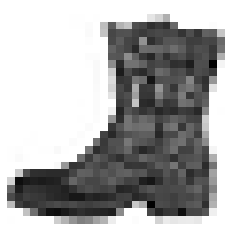

In [95]:
show_image(x_train,150)

# Simple model

## Standardisation

In [11]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
simple_model = Sequential(
    [
        Dense(16,input_dim=784,activation='relu'),
        Dense(14,activation='relu'),
        Dense(10,activation='softmax',name='output_layer'),
    ]
)

2022-06-16 14:02:47.207691: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 14:02:47.208414: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 14:02:47.208913: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA GeForce GTX 1660 computeCapability: 7.5
coreClock: 1.785GHz coreCount: 22 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 178.86GiB/s
2022-06-16 14:02:47.208969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-16 14:02:47.209010: I tensorflow/stream_executor/plat

In [13]:
simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = simple_model.fit(x_train,y_train,epochs=10,batch_size=256,verbose=1,validation_split=0.1)

2022-06-16 14:02:49.456451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-16 14:02:49.474612: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1700000000 Hz


Epoch 1/10


2022-06-16 14:02:49.963461: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


211/211 [==============================] - 2s 6ms/step - loss: 1.5868 - accuracy: 0.4467 - val_loss: 0.6762 - val_accuracy: 0.7625
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 0.6276 - accuracy: 0.7872 - val_loss: 0.5301 - val_accuracy: 0.8095
Epoch 3/10
211/211 [==============================] - 1s 3ms/step - loss: 0.5065 - accuracy: 0.8279 - val_loss: 0.4897 - val_accuracy: 0.8210
Epoch 4/10
211/211 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.8422 - val_loss: 0.4579 - val_accuracy: 0.8357
Epoch 5/10
211/211 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8494 - val_loss: 0.4369 - val_accuracy: 0.8453
Epoch 6/10
211/211 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8532 - val_loss: 0.4281 - val_accuracy: 0.8482
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8591 - val_loss: 0.4286 - val_accuracy: 0.8457
Epoch 8/10
211/21

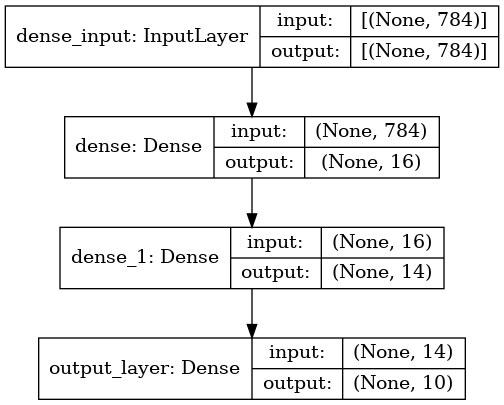

In [15]:
plot_model(simple_model, to_file='../img/fashion/simple_model.png', show_shapes=True)

In [16]:
_, test_acc = simple_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8485


In [17]:
print(test_acc)

0.8485000133514404


# CNN

## Fonctions support

In [108]:
def plot_history(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']
    fig,ax = plt.subplots(figsize=(14,7))
    ax.plot(val_acc,label='validation accuracy')
    ax.plot(train_acc,label='training accuracy')
    ax.legend()
    ax.set_title('Accuracy in train and validation set')
    plt.show()

In [109]:
def compile_fit_evaluate_model(model,X=x_train,y=y_train,epochs=10,batch_size=50,validation_split=0.1):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size, validation_split=validation_split)
    print('--------------- Test Accuracy -------------------')
    _, test_acc = model.evaluate(x_test, y_test)
    print(test_acc)
    plot_history(history)
    return history,model

Pour le CNN il faut avoir une img en input (matrice 2 dim)

In [110]:
(x_train, y_train), (x_test, y_test) = mnist_fashion

## Standardisation

In [111]:
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Simple Model

In [22]:
simple_cnn = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

In [23]:
simple_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
simple_cnn.fit(x_train, y_train, epochs=10,batch_size=50, validation_split=0.1)

Epoch 1/10


2022-06-16 14:03:00.401098: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-06-16 14:03:02.053779: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-06-16 14:03:02.160091: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1080/1080 [==============================] - 8s 3ms/step - loss: 0.6251 - accuracy: 0.7840 - val_loss: 0.3463 - val_accuracy: 0.8782
Epoch 2/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3456 - accuracy: 0.8796 - val_loss: 0.3093 - val_accuracy: 0.8898
Epoch 3/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2978 - accuracy: 0.8932 - val_loss: 0.2955 - val_accuracy: 0.8953
Epoch 4/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2743 - accuracy: 0.9018 - val_loss: 0.2798 - val_accuracy: 0.8970
Epoch 5/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2550 - accuracy: 0.9100 - val_loss: 0.2930 - val_accuracy: 0.8938
Epoch 6/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2407 - accuracy: 0.9137 - val_loss: 0.3073 - val_accuracy: 0.8892
Epoch 7/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2283 - accuracy: 0.9193 - val_loss: 0.2722 - val_accuracy: 0.9038
Epo

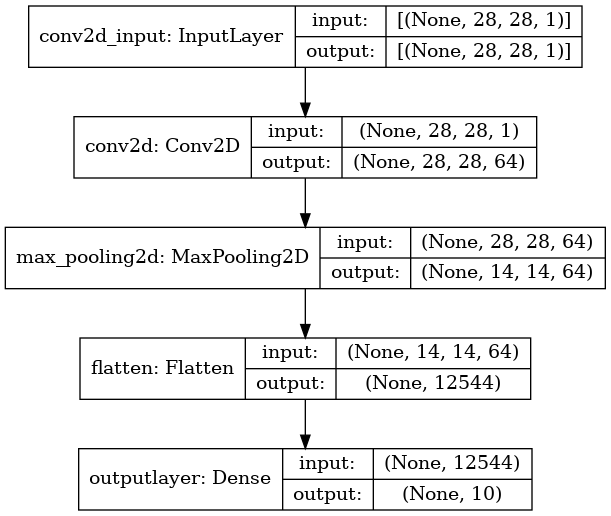

In [25]:
plot_model(simple_cnn, to_file='../img/fashion/simple_cnn_model.png', show_shapes=True)

In [26]:
_, test_acc = simple_cnn.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.2800 - accuracy: 0.9030
0.902999997138977


## CNN with additional dense layer

In [37]:
cnn_2 = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(16,activation='relu'),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

Epoch 1/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.7930 - accuracy: 0.7272 - val_loss: 0.3715 - val_accuracy: 0.8643
Epoch 2/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.3558 - accuracy: 0.8750 - val_loss: 0.3286 - val_accuracy: 0.8792
Epoch 3/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.3051 - accuracy: 0.8915 - val_loss: 0.3124 - val_accuracy: 0.8910
Epoch 4/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2750 - accuracy: 0.9020 - val_loss: 0.2893 - val_accuracy: 0.8960
Epoch 5/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2608 - accuracy: 0.9082 - val_loss: 0.2774 - val_accuracy: 0.9015
Epoch 6/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2385 - accuracy: 0.9166 - val_loss: 0.2897 - val_accuracy: 0.8980
Epoch 7/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2278 - accuracy: 0.9206 - val_loss: 0.2713 - val_accuracy:

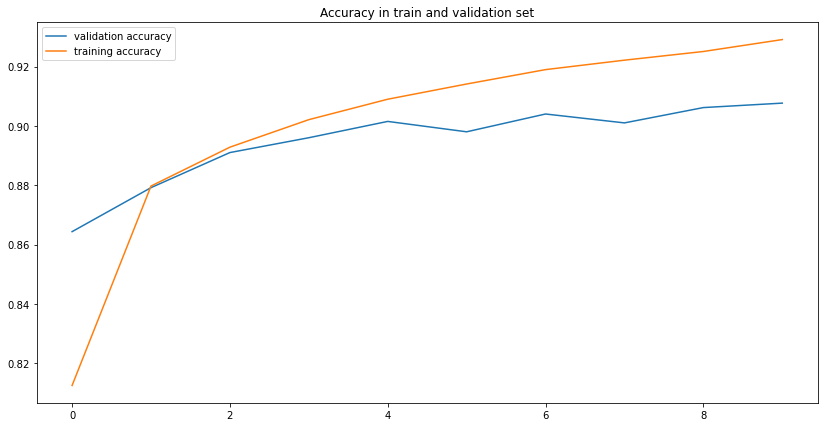

In [38]:
history,cnn_2 = compile_fit_evaluate_model(cnn_2)

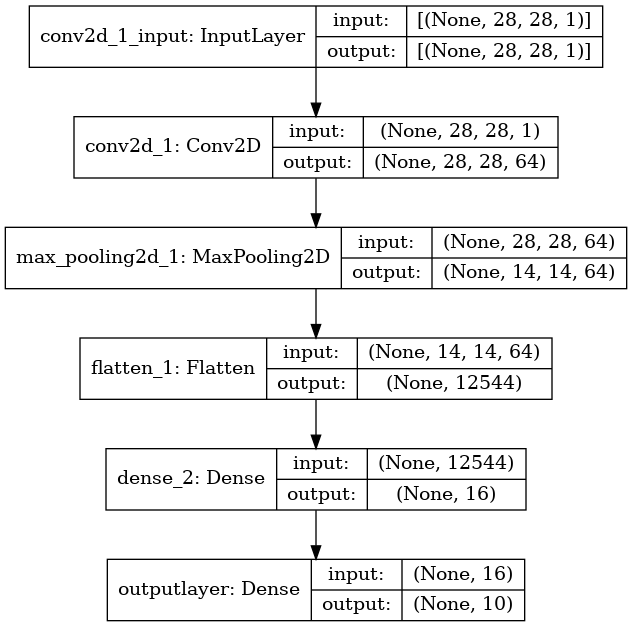

In [29]:
plot_model(cnn_2, to_file='../img/fashion/cnn_2.png', show_shapes=True)

In [30]:
cnn_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                200720    
_________________________________________________________________
outputlayer (Dense)          (None, 10)                170       
Total params: 201,210
Trainable params: 201,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
_, test_acc = cnn_2.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.9039
0.9039000272750854


Pas vraiment d'amélioration avec une couche de neurone en plus

## CNN with additional conv and pooling layer

In [98]:
cnn_3 = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=124, kernel_size=2, padding='same', activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

Epoch 1/10
1080/1080 [==============================] - 5s 5ms/step - loss: 0.6768 - accuracy: 0.7580 - val_loss: 0.3773 - val_accuracy: 0.8595
Epoch 2/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.3629 - accuracy: 0.8715 - val_loss: 0.3095 - val_accuracy: 0.8903
Epoch 3/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.3245 - accuracy: 0.8848 - val_loss: 0.2920 - val_accuracy: 0.8948
Epoch 4/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2957 - accuracy: 0.8933 - val_loss: 0.2843 - val_accuracy: 0.8987
Epoch 5/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2774 - accuracy: 0.9016 - val_loss: 0.2620 - val_accuracy: 0.9032
Epoch 6/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2679 - accuracy: 0.9035 - val_loss: 0.2534 - val_accuracy: 0.9090
Epoch 7/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2491 - accuracy: 0.9103 - val_loss: 0.2431 - val_accuracy:

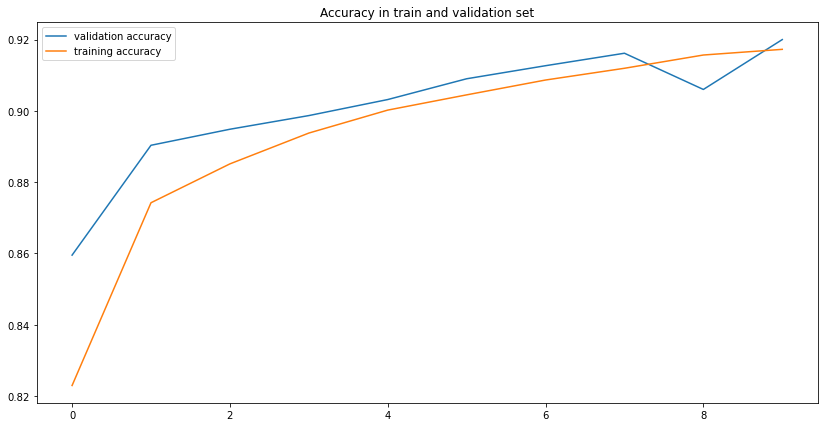

In [94]:
history,cnn_3 = compile_fit_evaluate_model(cnn_3)

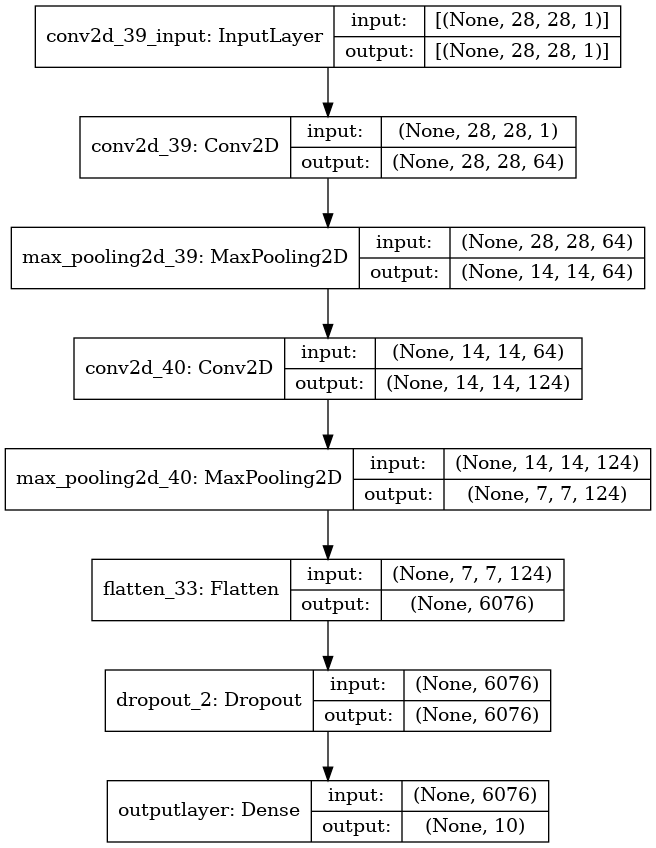

In [95]:
plot_model(cnn_3, to_file='../img/fashion/cnn_3.png', show_shapes=True)

In [46]:
_, test_acc = cnn_3.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.9047
0.904699981212616


## Inspiration a partir de LeNet-5

In [51]:
LeNet_cnn = Sequential(
    [
        Conv2D(filters=6, kernel_size=5, strides=(1,1),padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=16, kernel_size=5,padding='same', activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(120,activation='relu'),
        Dense(84,activation='relu'),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

Epoch 1/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.7068 - accuracy: 0.7464 - val_loss: 0.4073 - val_accuracy: 0.8537
Epoch 2/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.3509 - accuracy: 0.8724 - val_loss: 0.3732 - val_accuracy: 0.8583
Epoch 3/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.3016 - accuracy: 0.8892 - val_loss: 0.2917 - val_accuracy: 0.8895
Epoch 4/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2575 - accuracy: 0.9062 - val_loss: 0.2822 - val_accuracy: 0.8987
Epoch 5/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2405 - accuracy: 0.9106 - val_loss: 0.2711 - val_accuracy: 0.8998
Epoch 6/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2154 - accuracy: 0.9205 - val_loss: 0.2548 - val_accuracy: 0.9025
Epoch 7/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2006 - accuracy: 0.9249 - val_loss: 0.2651 - val_accuracy:

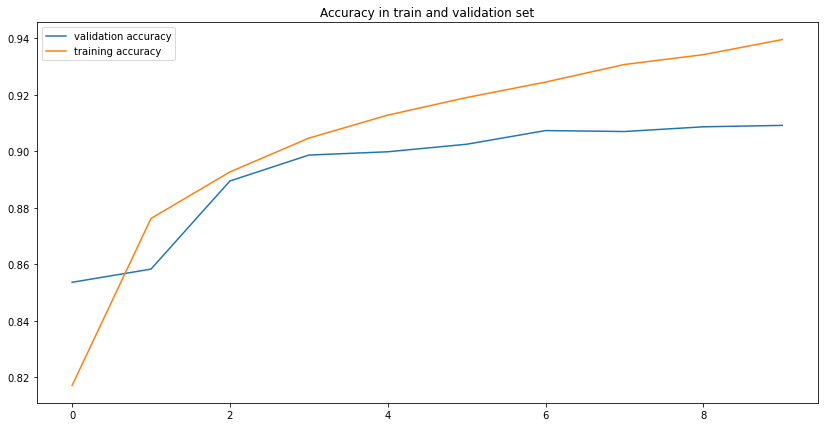

In [52]:
history,LeNet_cnn = compile_fit_evaluate_model(LeNet_cnn)

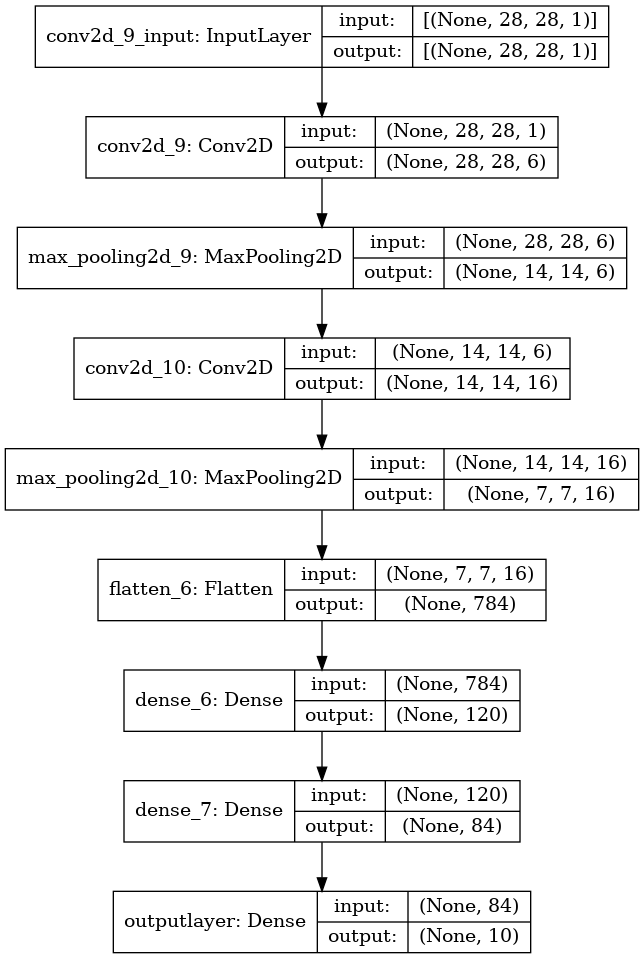

In [53]:
plot_model(LeNet_cnn, to_file='../img/fashion/lenet_custom.png', show_shapes=True)

## CNN with dropout layer

In [65]:
simple_cnn_drop_out = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        SpatialDropout2D(rate=0.2),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

Epoch 1/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2543 - accuracy: 0.9110 - val_loss: 0.3076 - val_accuracy: 0.8942
Epoch 2/25
1080/1080 [==============================] - 4s 3ms/step - loss: 0.2402 - accuracy: 0.9130 - val_loss: 0.2767 - val_accuracy: 0.9023
Epoch 3/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2364 - accuracy: 0.9166 - val_loss: 0.2682 - val_accuracy: 0.9028
Epoch 4/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2263 - accuracy: 0.9197 - val_loss: 0.2689 - val_accuracy: 0.9070
Epoch 5/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2198 - accuracy: 0.9222 - val_loss: 0.2794 - val_accuracy: 0.9038
Epoch 6/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2129 - accuracy: 0.9235 - val_loss: 0.2670 - val_accuracy: 0.9038
Epoch 7/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2058 - accuracy: 0.9255 - val_loss: 0.2800 - val_accuracy:

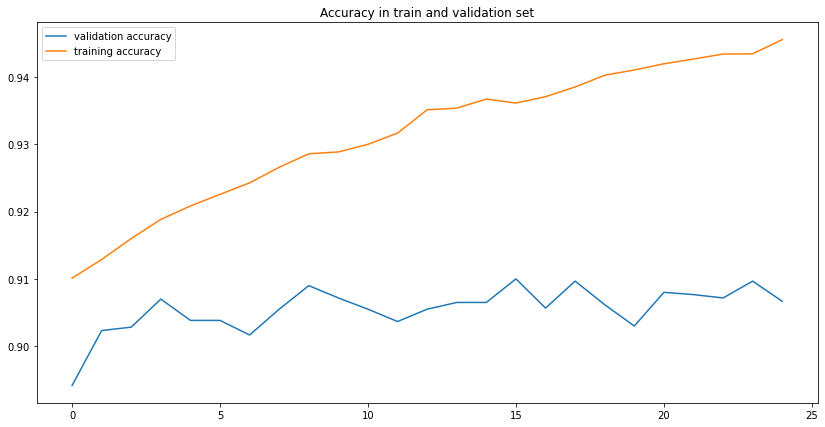

In [67]:
history,simple_cnn_drop_out = compile_fit_evaluate_model(simple_cnn_drop_out,epochs=25)

### Optimisation of drop out rate

In [75]:
def build_dropout(rate):
    simple_cnn_drop_out = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        SpatialDropout2D(rate=rate),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)
    return simple_cnn_drop_out

In [83]:
arr_rate = np.linspace(0.1,0.9,num=9) 

In [84]:
arr_rate

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Epoch 1/5
1080/1080 [==============================] - 4s 4ms/step - loss: 0.9868 - accuracy: 0.6668 - val_loss: 0.4169 - val_accuracy: 0.8503
Epoch 2/5
1080/1080 [==============================] - 4s 3ms/step - loss: 0.5729 - accuracy: 0.8110 - val_loss: 0.3798 - val_accuracy: 0.8635
Epoch 3/5
1080/1080 [==============================] - 4s 3ms/step - loss: 0.5389 - accuracy: 0.8208 - val_loss: 0.3718 - val_accuracy: 0.8648
Epoch 4/5
1080/1080 [==============================] - 4s 3ms/step - loss: 0.5119 - accuracy: 0.8344 - val_loss: 0.3507 - val_accuracy: 0.8745
Epoch 5/5
1080/1080 [==============================] - 4s 4ms/step - loss: 0.4979 - accuracy: 0.8375 - val_loss: 0.3486 - val_accuracy: 0.8767
--------------- Test Accuracy -------------------
313/313 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8729
0.8729000091552734


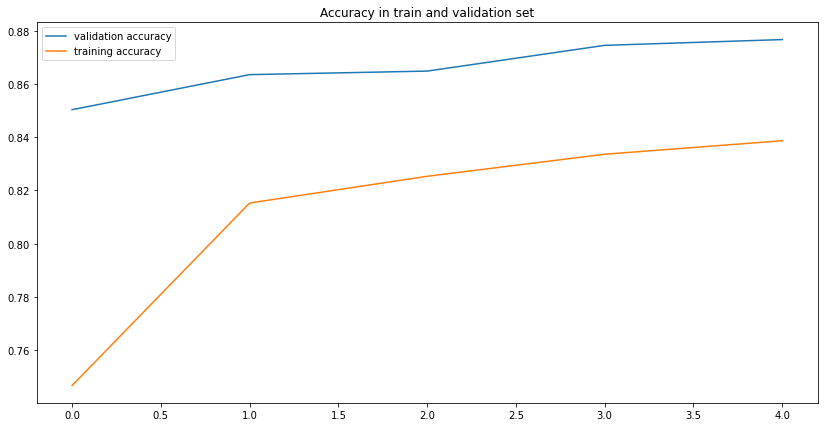

313/313 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8729


In [85]:
list_score =[]
for rate in arr_rate:
    model = build_dropout(rate)
    clear_output(wait=True)
    hist,model = compile_fit_evaluate_model(model,epochs=5)
    _, test_acc = model.evaluate(x_test, y_test)
    
    list_score.append(test_acc)

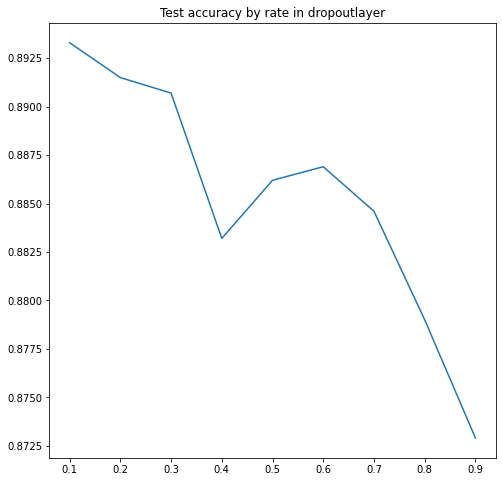

In [86]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(arr_rate,list_score)
ax.set_title('Test accuracy by rate in dropoutlayer')
plt.show()

## Best CNN

In [112]:
best_cnn = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=124, kernel_size=2, padding='same', activation='relu'),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dropout(0.2),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

Epoch 1/10
1080/1080 [==============================] - 6s 5ms/step - loss: 0.6387 - accuracy: 0.7740 - val_loss: 0.3343 - val_accuracy: 0.8795
Epoch 2/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.3240 - accuracy: 0.8841 - val_loss: 0.3030 - val_accuracy: 0.8892
Epoch 3/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2966 - accuracy: 0.8944 - val_loss: 0.2618 - val_accuracy: 0.9067
Epoch 4/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2563 - accuracy: 0.9100 - val_loss: 0.2693 - val_accuracy: 0.9030
Epoch 5/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2385 - accuracy: 0.9154 - val_loss: 0.2577 - val_accuracy: 0.9090
Epoch 6/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2221 - accuracy: 0.9187 - val_loss: 0.2525 - val_accuracy: 0.9118
Epoch 7/10
1080/1080 [==============================] - 5s 4ms/step - loss: 0.2076 - accuracy: 0.9242 - val_loss: 0.2761 - val_accuracy:

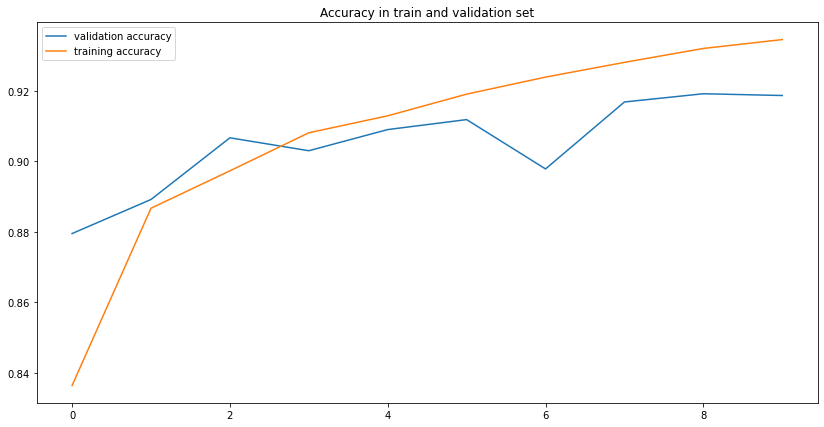

In [114]:
hist,best_cnn = compile_fit_evaluate_model(best_cnn,epochs=10)

### Plot test prediction

In [162]:
# Select 9 predictions 
rand_ind = np.random.randint(0,len(x_test),9)
x_to_plot = x_test[0:10]
y_true_to_plot = y_test[0:10]
y_true_to_plot = y_true_to_plot.argmax(axis=1)
y_pred_to_plot = best_cnn.predict(x_to_plot)
y_pred_label = y_pred_to_plot.argmax(axis=1)

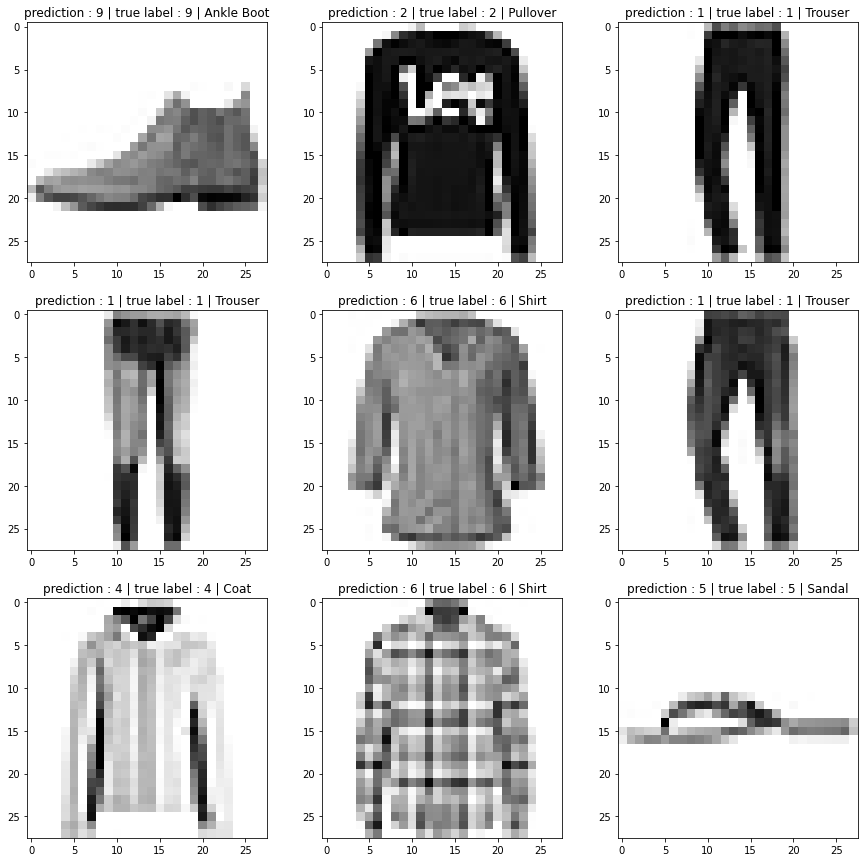

In [163]:
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(x_to_plot[i],cmap='binary')
    label_predicted = y_pred_label[i]
    true_label = y_true_to_plot[i]
    name = dict_label[true_label]
    axes[i].set_title(f'prediction : {label_predicted} | true label : {true_label} | {name}')
plt.show()

# CNN with image augmentation

### Using the simple CNN model

In [90]:
generator = ImageDataGenerator(brightness_range=(0,1))

In [91]:
simple_cnn_gen = Sequential(
    [
        Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)

In [92]:
simple_cnn_gen.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = simple_cnn_gen.fit(generator.flow(x_train, y_train), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 1.6690 - accuracy: 0.7916
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3886 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3445 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3284 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3087 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2944 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2912 - accuracy: 0.8974
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2797 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2739 - accuracy: 0.9040
Epoch 10/10
1875/1875 [==============================] - 32s 17m

# Ensemble CNN

In [76]:
def generate_simple_cnn_model():
    simple_cnn = Sequential(
    [
        Conv2D(filters=2, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        MaxPool2D(pool_size=2),
        Conv2D(filters=2, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)),
        Flatten(),
        Dense(10,activation='softmax',name='outputlayer'),
    ]
)
    simple_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return simple_cnn

In [77]:
def return_bootstrapped_data(x_train,y_train,n):
    maxi = len(x_train)
    rand_ind = np.random.randint(0,maxi,n)
    # print(np.unique(rand_ind).shape)
    x_boot = x_train[rand_ind]
    y_boot = y_train[rand_ind]
    
    return x_boot,y_boot

In [96]:
n_estimators = 10
models = []
for i in range(n_estimators):
    model = generate_simple_cnn_model()
    X_boot,y_boot = return_bootstrapped_data(x_train,y_train,30000)
    model.fit(X_boot,y_boot,verbose=0,epochs=10)
    models.append(model)

In [97]:
yhats = [model.predict(x_test) for model in models]
yhats = np.array(yhats)

In [98]:
yhats_mean = yhats.mean(axis=0)
yhats_mean.shape

(10000, 10)

In [99]:
y_pred = yhats_mean.argmax(axis=1)

In [100]:
y_test_lab = y_test.argmax(axis=1)

In [101]:
accuracy_ensemble = accuracy_score(y_test_lab,y_pred)
print(accuracy_ensemble)

0.8736


# Knowledge distillation

# Deep Explainer

https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html